In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv("Google_Stock_Price_Train.csv")
df_test=pd.read_csv("Google_Stock_Price_Test.csv")

In [3]:
train_data=df_train.iloc[:, 1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
train_data=scaler.fit_transform(train_data)

In [5]:
X_train=[]
y_train=[]
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [6]:
X_train, y_train=np.array(X_train), np.array(y_train)

In [7]:
X_train=np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model=Sequential([
    LSTM(150, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

In [9]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
12/12 [==============================] - 14s 333ms/step - loss: 0.0460
Epoch 2/10
12/12 [==============================] - 4s 334ms/step - loss: 0.0047
Epoch 3/10
12/12 [==============================] - 4s 307ms/step - loss: 0.0016
Epoch 4/10
12/12 [==============================] - 3s 289ms/step - loss: 7.6952e-04
Epoch 5/10
12/12 [==============================] - 4s 306ms/step - loss: 6.0156e-04
Epoch 6/10
12/12 [==============================] - 3s 256ms/step - loss: 5.4020e-04
Epoch 7/10
12/12 [==============================] - 3s 247ms/step - loss: 5.4504e-04
Epoch 8/10
12/12 [==============================] - 3s 273ms/step - loss: 5.3717e-04
Epoch 9/10
12/12 [==============================] - 4s 309ms/step - loss: 5.1679e-04
Epoch 10/10
12/12 [==============================] - 4s 293ms/step - loss: 5.1453e-04


In [10]:
test_data=df_test.iloc[:, 1:2].values

In [11]:
dataset_total=pd.concat((df_train['Open'], df_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total)-len(df_test)-60:].values

C:\Users\suraj\AppData\Local\Temp\ipykernel_6984\3468560622.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs=dataset_total[len(dataset_total)-len(df_test)-60:].values


In [12]:
inputs=inputs.reshape(-1, 1)
Inputs=scaler.transform(inputs)

In [13]:
X_test=[]
for i in range(60, len(Inputs)):
    X_test.append(Inputs[i-60:i, 0])
X_test=np.array(X_test)

In [14]:
X_test=np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))

In [15]:
predictions=model.predict(X_test)
pred=scaler.inverse_transform(predictions)

4/4 [==============================] - 2s 65ms/step


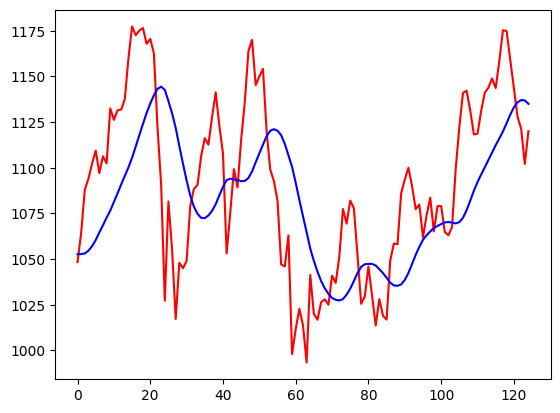

In [16]:
import matplotlib.pyplot as plt
plt.plot(test_data, color='red')
plt.plot(pred, color='blue')